In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import datetime

In [2]:
df = pd.read_csv('the_guardian/combined_filtered.csv')

# Preprocess data

In [6]:
# Here is an example of an URL https://content.guardianapis.com/politics/2017/may/19/theresa-may-tories-will-invest-heavily-in-scotland-after-brexit
# I want to extract the date of release
# But may be useless

def extract_date(url):
    try:
        datereleased = datetime.datetime.strptime(datereleased, '%Y/%b/%d')
    except:
        datereleased = np.nan
    return theme, datereleased

In [10]:
# Change some information from the original dataset

def adapt_dataset(df):
    #remove useless columns : id, isHosted, sectionId, pillarId
    df.drop(['id', 'isHosted', 'sectionId', 'pillarId'], axis=1, inplace=True)
    # Change the name of columns
    df.rename(columns={'webPublicationDate': 'date', 'webTitle': 'title', 'sectionName': 'theme', 'Unnamed: 0':'index', 'fields.bodyText':"article"}, inplace=True)

# Analysis of data

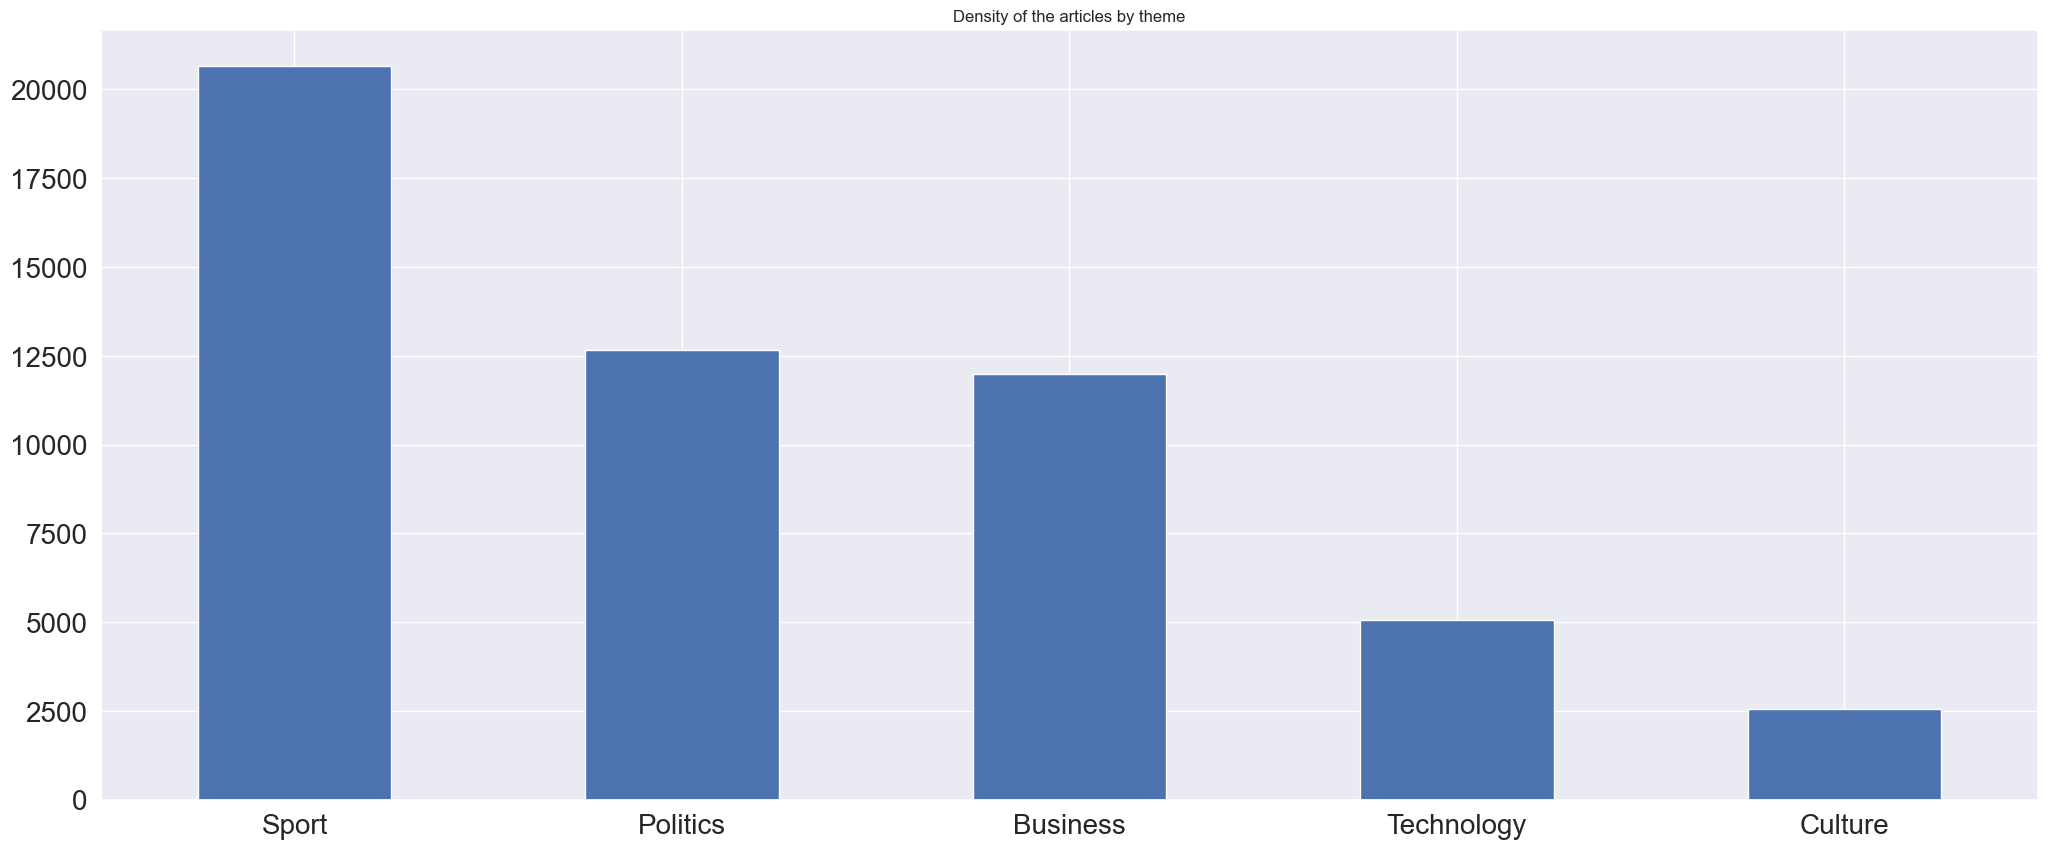

In [39]:
# Display the density of the articles by theme

def display_density(df):
    # Display the density of the articles by theme
    df['theme'].value_counts().plot(kind='bar', figsize=(25,10), fontsize=20)
    plt.title('Density of the articles by theme')
    plt.xticks(rotation=0)
    plt.show()

display_density(df)

<Figure size 2500x1000 with 0 Axes>

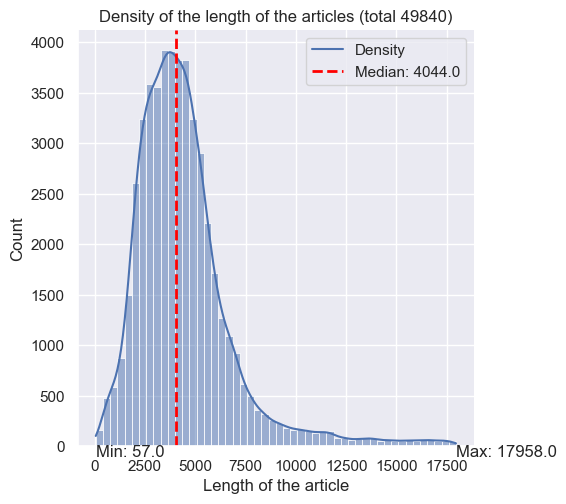

In [52]:
#Display the density of the length of the articles

def display_length(df):
    # Display the density of the length of the articles
    length = df['article'].str.len()

    #Find the 95% quantile (to remove outliers)
    q = int(length.quantile(0.95))

    #Keep only the values below the 95% quantile
    length = length[length < q]

    #Arbitrary: remove short sentences
    length = length[length > 50]

    #Plot 
    plt.figure(figsize=(25,10))
    fig = sns.displot(length,bins=50, kde=True)

    #Plot median
    fig.ax.axvline(length.median(), color='red', linestyle='dashed', linewidth=2)
    fig.ax.set_title(f'Density of the length of the articles (total {len(length)})')
    fig.ax.set_xlabel('Length of the article')
    fig.ax.legend(['Density', f'Median: {length.median()}'])

    #Add text for the min and max values
    fig.ax.text(length.min(), -100, f'Min: {length.min()}')
    fig.ax.text(length.max(), -100, f'Max: {length.max()}')

    plt.show()

display_length(df)